In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset (update 'your_file.csv' with the actual file path)
df = pd.read_csv(r"C:\Atacho\2025\Y4PROJECT\Now\marketpricedata.csv")

In [3]:
# Display basic info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Commodity      3000 non-null   object 
 1   Market         3000 non-null   object 
 2   Wholesale      3000 non-null   object 
 3   Retail         3000 non-null   object 
 4   Supply Volume  2387 non-null   float64
 5   County         2995 non-null   object 
 6   Date           3000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 164.2+ KB
None


In [4]:
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
# Sort by date (important for time series forecasting)
df = df.sort_values(by="Date")

In [6]:
# Handle missing values (fill with median)
df.fillna(df.median(numeric_only=True), inplace=True)

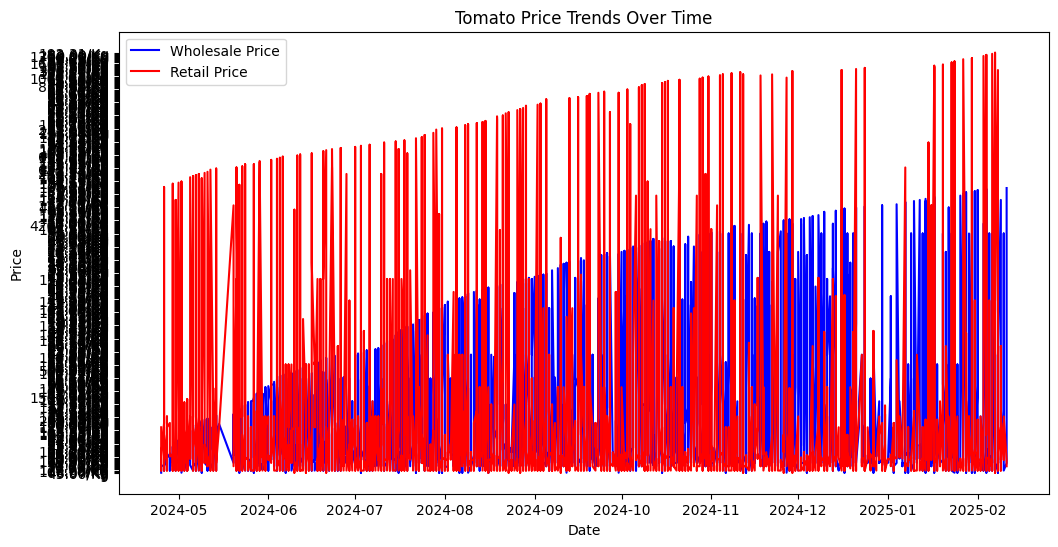

In [7]:
# Visualize trends in wholesale and retail prices
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Wholesale"], label="Wholesale Price", color="blue")
plt.plot(df["Date"], df["Retail"], label="Retail Price", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Tomato Price Trends Over Time")
plt.legend()
plt.show()

In [8]:
# Extract the month from the date
df["Month"] = df["Date"].dt.month

In [9]:
# Remove non-numeric characters and convert to numeric
df["Wholesale"] = pd.to_numeric(df["Wholesale"].str.replace(r'[^\d.-]', '', regex=True), errors='coerce')
df["Retail"] = pd.to_numeric(df["Retail"].str.replace(r'[^\d.-]', '', regex=True), errors='coerce')

# Now you can group by month and calculate the mean price
monthly_trends = df.groupby("Month")[["Wholesale", "Retail"]].mean()


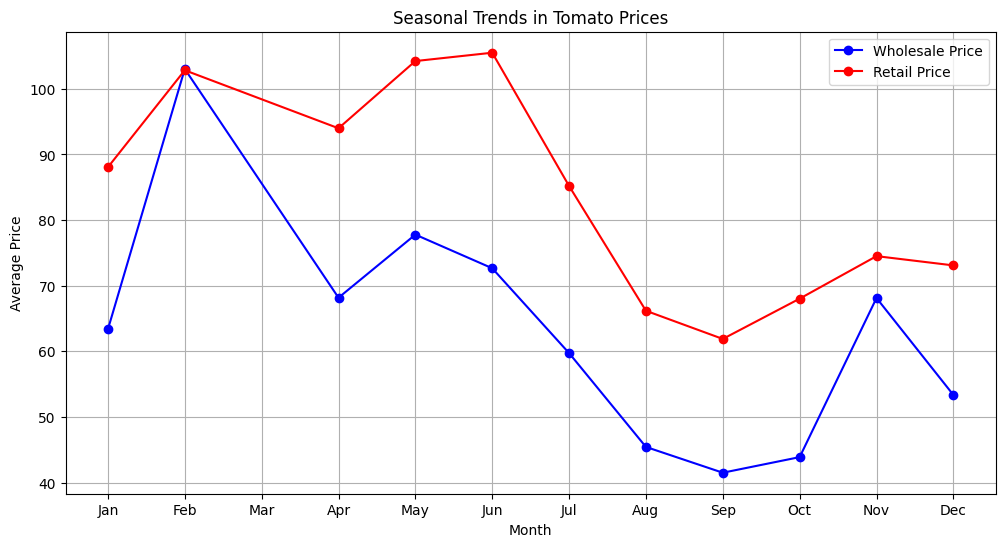

In [10]:
# Plot seasonality trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends["Wholesale"], marker="o", linestyle="-", label="Wholesale Price", color="blue")
plt.plot(monthly_trends.index, monthly_trends["Retail"], marker="o", linestyle="-", label="Retail Price", color="red")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Seasonal Trends in Tomato Prices")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Save the processed dataframe (optional)
df.to_csv('processed_data.csv', index=False)